In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('/content/drive/Othercomputers/My Laptop/Advanced/D-Learning/231006/code - update_1/iris_full.csv', dtype=None, delimiter=',', skip_header=1)
X = iris[:, :4]
y = iris[:, 4]

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
m = X.shape[0]

print('X_b', X_b.shape)
print('y', y.shape)
print('m', m)

X_b (100, 5)
y (100,)
m 100


In [3]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

In [4]:
# training
lr = 0.01
num_iter = 100
minibatch_size = 32

theta = np.array([0.1, 0.5, 0.1, 0.5, -0.1])

losses = []
accs   = []

for i in range(num_iter):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled     = X_b[shuffled_indices]
    y_shuffled       = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]

        # compute output
        z = np.dot(xi, theta)
        y_hat = sigmoid_function(z)

        # compute loss
        loss = loss_function(y_hat, yi)

        # compute gradient
        gradient = np.dot(xi.T, (y_hat - yi)) / yi.size

        # update
        theta -= lr*gradient

        # ===========================
        # loss
        losses.append(loss)

        # accuracy
        preds = predict(xi, theta).round()
        acc = (preds == yi).mean()
        accs.append(acc)

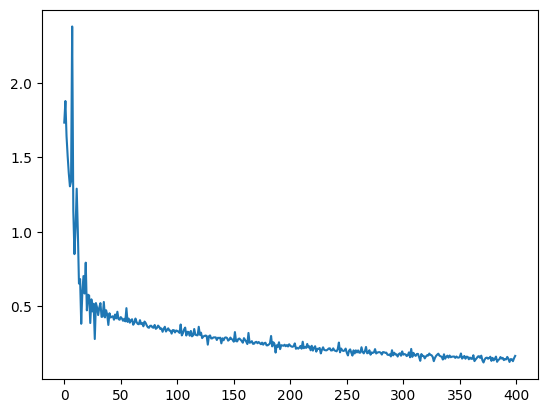

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

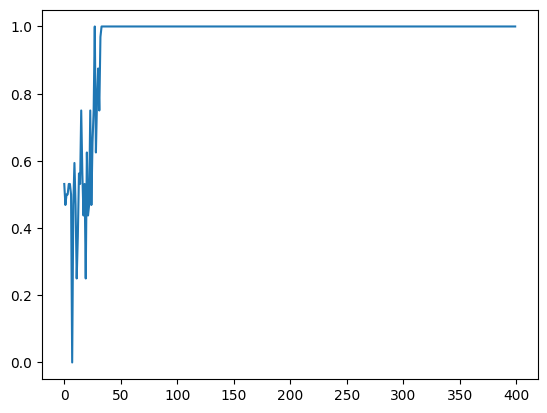

In [6]:
import matplotlib.pyplot as plt

plt.plot(accs)
plt.show()